In [1]:
# SH-I

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
lectins = ['ACG', 'CTB', 'DC_SIGN', 'Gal4', 'LCA', 'MAL', 'NPL', 'PSA', 'SBA', 'SNL', 'UEA']

lectin_dict = {'ACG' : 'Agrocybe cylindracea lectin',
               'CTB' : 'Cholera Toxin B subunit',
               'DC_SIGN' : 'DC-SIGN CRD',
               'Gal4' : 'Gal4-mAb',
               'LCA' : 'Lens culinaris Agglutinin',
               'MAL' : 'Maachkia amurensis Leukoagglutinin',
               'NPL' : 'Narcissus pseudonarcissus lectin',
               'PSA' : 'Pisum sativum Agglutinin',
               'SBA' : 'Soyabean Agglutinin',
               'SNL' : 'Sambucus nigra lectin',
               'UEA' : 'Ulex europaeus Agglutinin'}

In [92]:
def plot_final(lectin, save = False, draw = False):
    
    fs = 15
    
    plt.rcParams['font.family'] = 'arial'
    plt.rcParams['svg.fonttype'] = 'none'
    
    aligned = pd.read_csv('figures/outputs/' + lectin + '.csv')
    aligned = numbered(aligned)
    
    aligned['IUPAC (LiGA)'] = aligned['IUPAC (LiGA)'].fillna('')
    aligned['IUPAC (CFG)'] = aligned['IUPAC (CFG)'].fillna('')
    
    # replace this with real data
    # aligned['LiGA StDev'] = np.random.randint(1, 3, len(aligned)).astype(np.float)
    
    x1, y1 = aligned['LiGA Count'], aligned['total'] # add here
    x2, y2, e2 = aligned['CFG Count'], aligned['Average RFU'] / 1000, aligned['StDev'] / 1000

    i1 = np.arange(len(x1))
    i2 = np.arange(len(x2))
    
    fig, (ax1, ax2) = plt.subplots(2, figsize = (20, 10))

    liga = ax1.bar(i1, y1, color = 'steelblue', zorder = 3) # and here
    ax1.xaxis.tick_top() 
    plt.sca(ax1)
    plt.ylabel('Enrichment', fontsize = fs)
    plt.xticks(i2, x1, rotation = 'vertical')
    plt.grid(True, axis = 'x')
    # plt.title(lectin_dict[lectin], fontsize = fs + 5, y = 1.08)
    plt.tight_layout()
    ax1.yaxis.tick_right()
    ax1.yaxis.set_label_position("right")
    plt.yticks(rotation = 'vertical')

    cfg = ax2.bar(i2, y2, yerr = e2, capsize = 3, color = 'black', zorder = 3)
    plt.sca(ax2)
    plt.ylabel('Average RFU x $10^3$', fontsize = fs)
    plt.xticks(i2, x2, rotation = 'vertical')
    plt.grid(True, axis = 'x', zorder = 0)
    ax2.invert_yaxis()
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    plt.yticks(rotation = 'vertical')

    plt.subplots_adjust(hspace = 0.05)
    plt.legend([liga, cfg], ['LiGA', 'CFG'], loc = 4, prop = {'size': fs})
    plt.tight_layout()
    
    plt.text(-7, 0, lectin_dict[lectin], fontsize = fs + 5,
             horizontalalignment = 'center', verticalalignment = 'center',
             rotation = 'vertical')
    
    if save:

        plt.savefig('figures/final/' + lectin + '.svg', format = 'svg', bbox_inches = 'tight')
    
    else:
        
        plt.show()
        
    if draw:
        
        drawer(aligned, lectin)

In [87]:
def numbered(aligned):
    
    liga = aligned['IUPAC (LiGA)']
    cfg = aligned['IUPAC (CFG)']
    
    liga_count = 1
    liga_count_list = []

    for x in liga:

        if x is not np.NaN:

            liga_count_list.append(str(liga_count))

            liga_count += 1

        else:

            liga_count_list.append('')

    aligned['LiGA Count'] = liga_count_list

    cfg_count = 1
    cfg_count_list = []

    for x in cfg:

        if x is not np.NaN:

            cfg_count_list.append(str(cfg_count))

            cfg_count += 1

        else:

            cfg_count_list.append('')

    aligned['CFG Count'] = cfg_count_list
    
    aligned = aligned[['LiGA Count', 'IUPAC (LiGA)', 'total', 'CFG Count', 'IUPAC (CFG)', 'Average RFU', 'StDev']]
    
    return aligned

In [88]:
def drawer(aligned, lectin):

    aligned['total'] = norm(aligned['total'])
    aligned['Average RFU'] = norm(aligned['Average RFU'])

    for c, n in zip(aligned[aligned['total'] > 0.7]['LiGA Count'],
                    aligned[aligned['total'] > 0.7]['IUPAC (LiGA)']):

        for filename in os.listdir(os.getcwd() + '/drawings/eps/liga'):

            if n in filename:

                os.system('cp "' + os.getcwd() + '/drawings/eps/liga/' + filename +
                            '" "' + os.getcwd() + '/figures/final/drawn/' + lectin + '_liga_' + c + '_' + n + '.eps"')

    for c, n in zip(aligned[aligned['Average RFU'] > 0.7]['CFG Count'],
                    aligned[aligned['Average RFU'] > 0.7]['IUPAC (CFG)']):

        for filename in os.listdir(os.getcwd() + '/drawings/eps/cfg'):

            if n in filename:

                os.system('cp "' + os.getcwd() + '/drawings/eps/cfg/' + filename +
                            '" "' + os.getcwd() + '/figures/final/drawn/' + lectin + '_cfg_' + c + '_' + n + '.eps"')

In [89]:
def norm(arr):
    
    p = (arr - arr.min())
    q = arr.max() - arr.min()
    
    return p / q

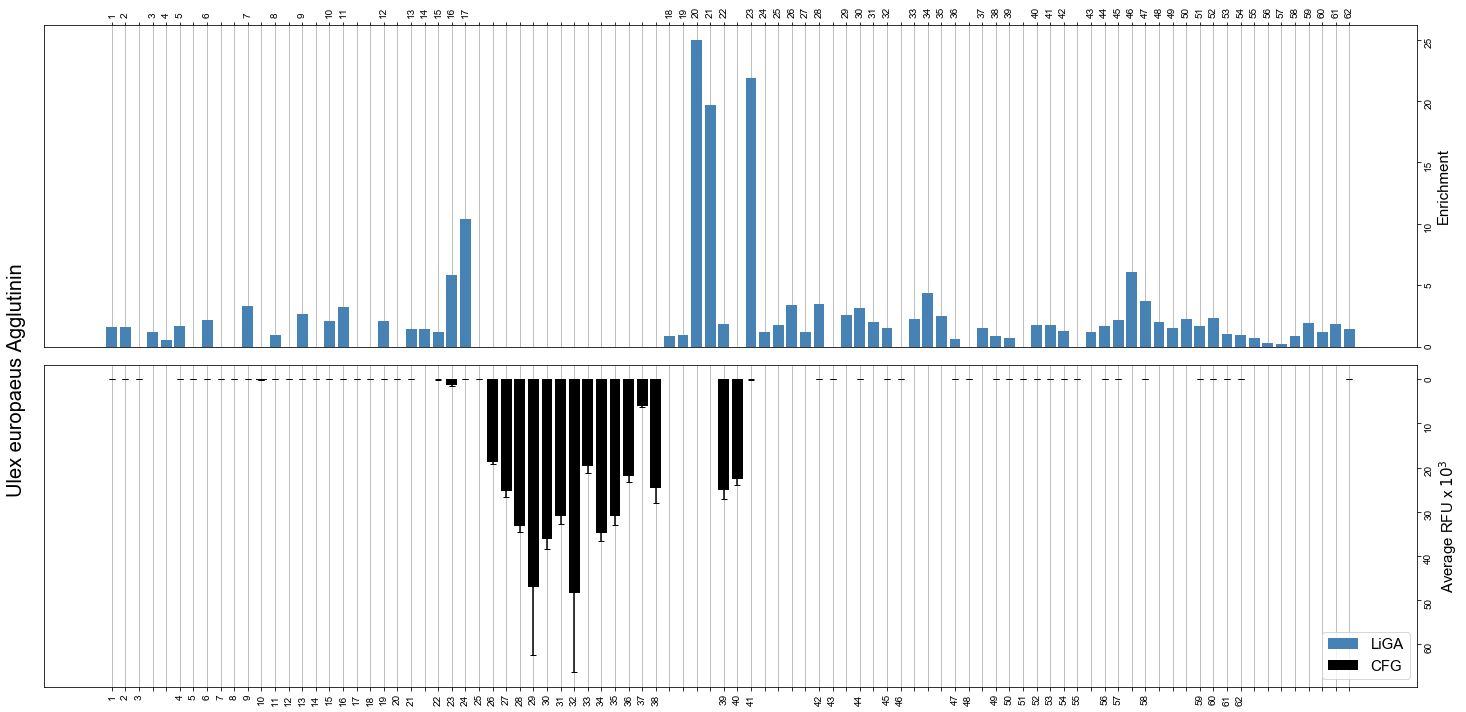

In [94]:
plot_final('UEA', save = True, draw = True)